In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dim_customers = pd.read_csv('Customers.csv')
fact_spends = pd.read_csv('Spends.csv')

In [4]:
dim_customers.head()

,customer_id,age_group,city,occupation,gender,marital_status,avg_income
0,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749
1,CUST002,45+,Chennai,Salaried IT Employees,Female,single,118912
2,CUST003,35-45,Hyderabad,Business Owners,Female,married,143413
3,CUST004,45+,Delhi-NCR,Salaried IT Employees,Female,single,60794
4,CUST005,45+,Hyderabad,Business Owners,Female,single,113072


In [5]:
dim_customers.describe()

,avg_income
count,500.000000
mean,84802.660000
std,37365.994505
min,20030.000000
25%,54009.750000
50%,86813.500000
75%,117080.500000
max,148646.000000


In [6]:
fact_spends.head()

,customer_id,month,category,payment_type,spend
0,CUST075,August,Groceries,Credit Card,3405.41
1,CUST181,October,Entertainment,UPI,5523.04
2,CUST067,May,Entertainment,Debit Card,16508.78
3,CUST054,July,Electronics,Credit Card,15618.32
4,CUST033,August,Groceries,Net Banking,6465.98


In [7]:
fact_spends.describe()

,spend
count,3000.000000
mean,10085.851233
std,5616.382073
min,500.580000
25%,5191.652500
50%,10171.460000
75%,14916.770000
max,19998.330000


In [10]:
# Check for missing values
dim_customers.isnull().sum(), fact_spends.isnull().sum()

(customer_id       0
 age_group         0
 city              0
 occupation        0
 gender            0
 marital_status    0
 avg_income        0
 dtype: int64,
 customer_id     0
 month           0
 category        0
 payment_type    0
 spend           0
 dtype: int64)

In [11]:
# Check for duplicates
dim_customers.duplicated().sum(), fact_spends.duplicated().sum()

(0, 0)

In [12]:
dim_customers.nunique(), dim_customers['age_group'].unique(), dim_customers.dtypes

(customer_id       500
 age_group           4
 city                5
 occupation          5
 gender              2
 marital_status      2
 avg_income        498
 dtype: int64,
 array(['25-34', '45+', '35-45', '21-24'], dtype=object),
 customer_id       object
 age_group         object
 city              object
 occupation        object
 gender            object
 marital_status    object
 avg_income         int64
 dtype: object)

In [15]:
#custom order for age groups
custom_order = ['21-24', '25-34', '35-45', '45+']

# Converting 'age_group' custom ordering, helps in plotting order wise
dim_customers['age_group'] = pd.Categorical(dim_customers['age_group'], categories=custom_order, ordered=True)

In [16]:
dim_customers.head()

,customer_id,age_group,city,occupation,gender,marital_status,avg_income
0,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749
1,CUST002,45+,Chennai,Salaried IT Employees,Female,single,118912
2,CUST003,35-45,Hyderabad,Business Owners,Female,married,143413
3,CUST004,45+,Delhi-NCR,Salaried IT Employees,Female,single,60794
4,CUST005,45+,Hyderabad,Business Owners,Female,single,113072


In [17]:
fact_spends.shape, dim_customers.shape

((3000, 5), (500, 7))

In [18]:
dim_customers.gender.value_counts(), dim_customers.age_group.value_counts()

(Female    272
 Male      228
 Name: gender, dtype: int64,
 45+      143
 25-34    127
 35-45    126
 21-24    104
 Name: age_group, dtype: int64)

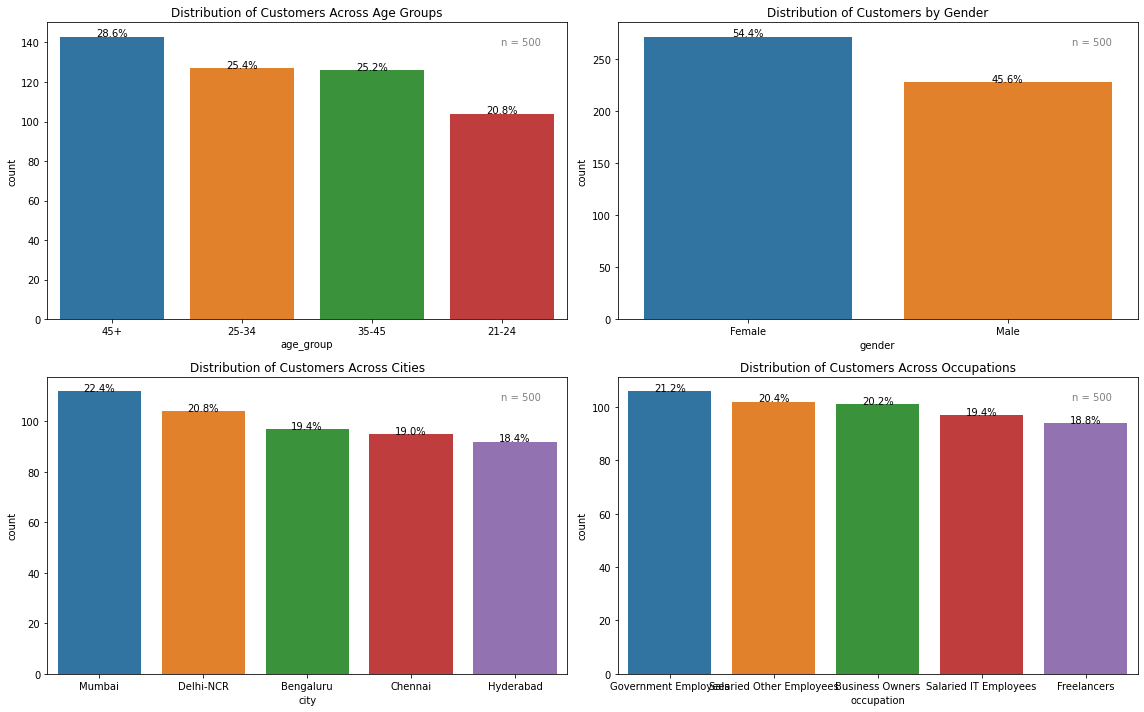

In [19]:
def countplot_with_percentage_subplot(data, x, title, subplot_position, show_sample_size = True):
    plt.subplot(subplot_position)
    sorted_data = data[x].value_counts().sort_values(ascending=False).index

    ax = sns.countplot(x=x, data=data, order=sorted_data)
    plt.title(title)
    total = len(data[x])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.1%}', ha="center")

    if show_sample_size:
        plt.text(0.95, 0.95, f'n = {total}', ha='right', va='top', transform=ax.transAxes, fontsize=10, color='gray')

    # plt.text(0.5, -0.1, f'n = {total}', ha='center', va='center', fontsize=10, color='gray')

plt.figure(figsize=(16, 10))

# Age Groups
countplot_with_percentage_subplot(dim_customers, 'age_group', 'Distribution of Customers Across Age Groups', 221)

# Genders
countplot_with_percentage_subplot(dim_customers, 'gender', 'Distribution of Customers by Gender', 222)

# Cities
countplot_with_percentage_subplot(dim_customers, 'city', 'Distribution of Customers Across Cities', 223)

# Occupations
countplot_with_percentage_subplot(dim_customers, 'occupation', 'Distribution of Customers Across Occupations', 224)

plt.tight_layout()
plt.show()

### This helps in understanding the distribution of customers across different age groups, genders, cities, and occupations.

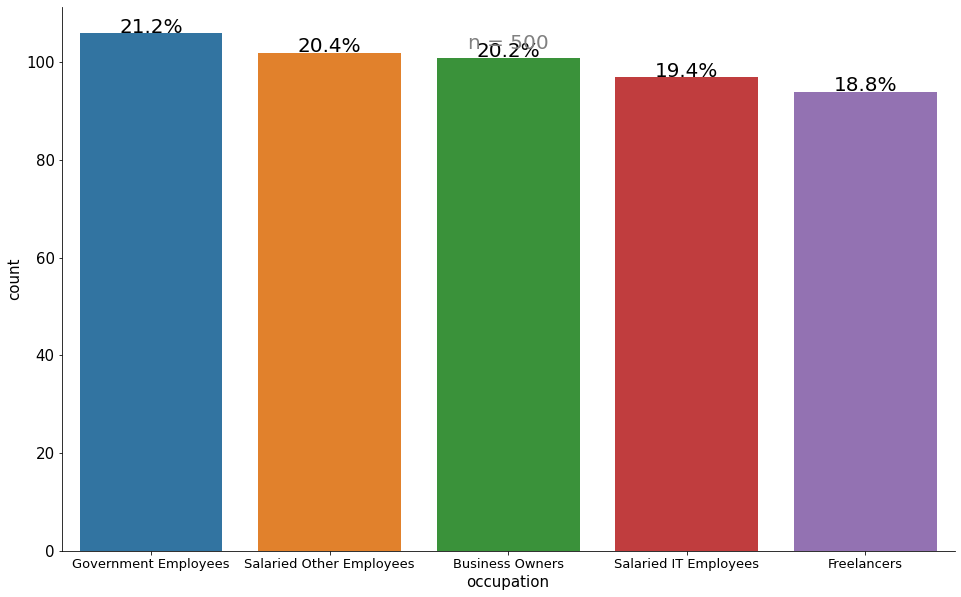

In [22]:
def countplot_with_percentage_subplot(data, x, title, subplot_position):
    plt.subplot(subplot_position)
    sorted_data = data[x].value_counts().sort_values(ascending=False).index
    sns.despine()
    ax = sns.countplot(x=x, data=data, order=sorted_data)

    total = len(data[x])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.1%}', ha="center", fontsize=20)

    plt.text(0.5, 0.95, f'n = {total}', ha='center', va='top', transform=ax.transAxes, fontsize=20, color='gray')
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=15)

plt.figure(figsize=(16, 10))
plt.xlabel('occupation', fontsize=15)
plt.ylabel('Customers Count', fontsize=15)
countplot_with_percentage_subplot(dim_customers, 'occupation', 'Distribution of Customers Across Occupations', 111)
plt.show()

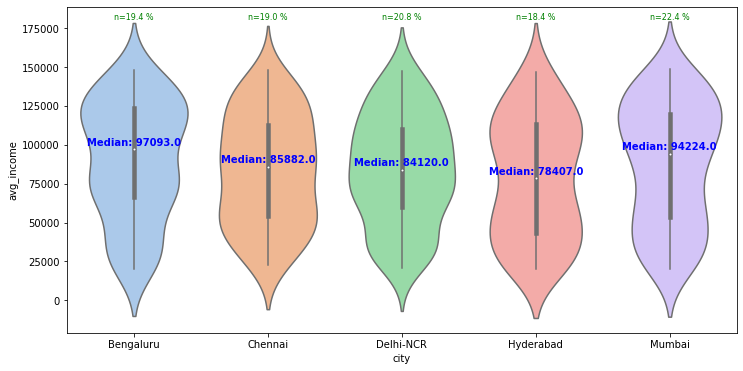

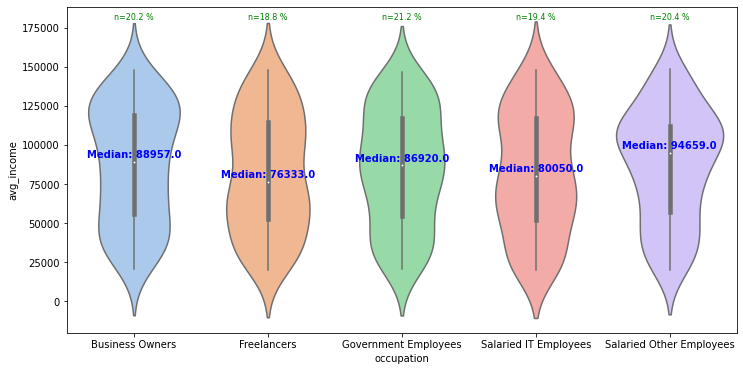

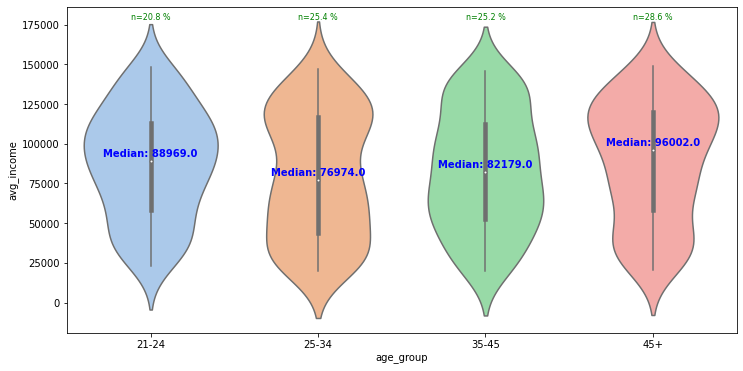

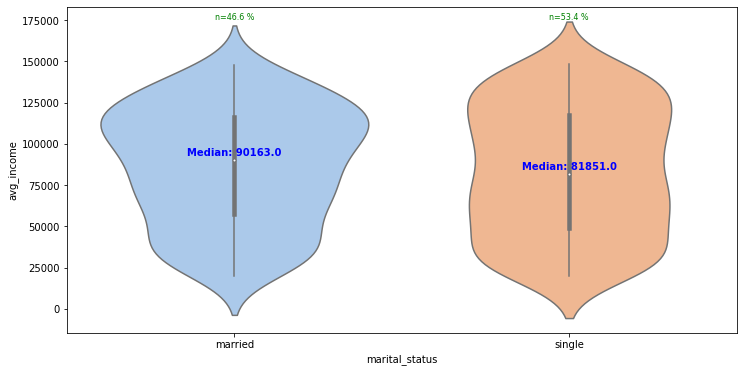

In [23]:
def draw_violinplot(data, x, y, title):
    sns.set_palette("pastel")
    x_order = sorted(data[x].unique())

    plt.figure(figsize=(12, 6))
    boxplot = sns.violinplot(x=x, y=y, data=data, order=x_order, showfliers=False)  # Hiding outliers for better visibility

    # # Add horizontal lines for medians
    # medians = data.groupby(x)[y].median().sort_values(ascending=False)
    # for i, group in enumerate(x_order):
    #     median_val = medians[group]
    #     plt.text(i, median_val + 1500, f'Median: {median_val}', ha='center', va='bottom', fontweight='bold', color='blue')

    medians = data.groupby(x)[y].median().sort_values(ascending=False)
    for i, group in enumerate(x_order):
        median_val = medians[group]
        plt.text(i, median_val + 1500, f'Median: {median_val}', ha='center', va='bottom', fontweight='bold', color='blue')

    for i, group in enumerate(x_order):
        sample_size = len(data[data[x] == group])
        percentage = round((sample_size/ len(data)) * 100 , 1)
        plt.text(i, plt.ylim()[1] - 0.05 * plt.ylim()[1], f'n={percentage} %', ha='center', va='bottom', color='green', fontsize=8)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
# City-wise income
draw_violinplot(dim_customers, 'city', 'avg_income', 'Average Income Distribution Across Cities')

# Occupation-wise income
draw_violinplot(dim_customers, 'occupation', 'avg_income', 'Average Income Distribution Across Occupations')

# Age group-wise income
draw_violinplot(dim_customers, 'age_group', 'avg_income', 'Average Income Distribution Across Age Groups')

# Marital status-wise income
draw_violinplot(dim_customers, 'marital_status', 'avg_income', 'Average Income Distribution By Marital Status')

#### The Violin plots helps in understanding the average income distributed across different cities, occupations and age groups and there significant variations.

In [26]:
def get_total_spends(df, category_col, group_col, spend_col):
    # Create a pivot table to get total spends by category and the specified grouping column
    total_spends_by_group = pd.pivot_table(df, values=spend_col, index=category_col, columns=group_col, aggfunc='sum', fill_value=0, margins=True, margins_name='Total')

    # Convert values to crores
    total_spends_by_group = total_spends_by_group.apply(lambda x: round(x / 10000000, 3))

    return total_spends_by_group

# Example usage
total_spends_by_category_month = get_total_spends(fact_spends, 'category', 'month', 'spend')
total_spends_by_category_payment_type = get_total_spends(fact_spends, 'category', 'payment_type', 'spend')

# Print the two separate DataFrames
print("Total Spends by Category and Month: (All the values in Crores)")
total_spends_by_category_month



Total Spends by Category and Month: (All the values in Crores)


month,August,July,June,May,October,September,Total
category,,,,,,,
Apparel,0.104,0.103,0.078,0.129,0.113,0.080,0.607
Electronics,0.093,0.105,0.119,0.110,0.096,0.103,0.627
Entertainment,0.105,0.099,0.109,0.103,0.108,0.078,0.601
Groceries,0.111,0.091,0.097,0.100,0.076,0.093,0.569
Travel,0.097,0.100,0.107,0.109,0.101,0.109,0.622
Total,0.510,0.499,0.509,0.551,0.494,0.463,3.026


In [27]:
print("\nTotal Spends by Category and Payment Type: (All the values in Crores)")
total_spends_by_category_payment_type


Total Spends by Category and Payment Type: (All the values in Crores)


payment_type,Credit Card,Debit Card,Net Banking,UPI,Total
category,,,,,
Apparel,0.139,0.158,0.147,0.163,0.607
Electronics,0.167,0.148,0.168,0.145,0.627
Entertainment,0.172,0.133,0.151,0.144,0.601
Groceries,0.125,0.148,0.150,0.146,0.569
Travel,0.147,0.174,0.148,0.154,0.622
Total,0.750,0.760,0.764,0.752,3.026


In [28]:
# Group by customer_id and calculate total transactions count and total spend
customer_totals = fact_spends.groupby(['customer_id', 'month','category']).agg(
    total_transactions=('spend', 'count'),
    total_spend=('spend', 'sum')
).reset_index()

customer_totals

,customer_id,month,category,total_transactions,total_spend
0,CUST001,August,Apparel,1,2199.46
1,CUST001,July,Apparel,1,12777.92
2,CUST001,July,Electronics,1,2870.01
3,CUST001,June,Travel,1,2089.68
4,CUST001,May,Electronics,1,6681.46
...,...,...,...,...,...
2676,CUST499,October,Entertainment,1,5394.66
2677,CUST500,June,Travel,1,12600.90
2678,CUST500,October,Electronics,1,1598.62
2679,CUST500,September,Entertainment,1,14552.69


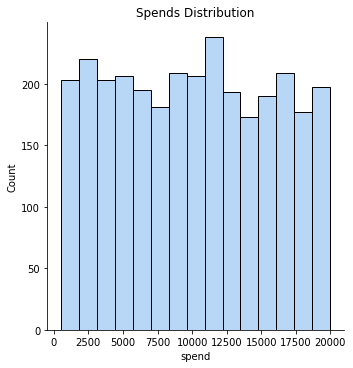

In [29]:
sns.displot(x='spend', data=fact_spends)
plt.title('Spends Distribution')
plt.show()

In [30]:
(len(fact_spends[fact_spends['spend'] > 2500]) / len(fact_spends) )* 100

89.16666666666667

In [31]:
merged_df = pd.merge(dim_customers, fact_spends, on='customer_id')
merged_df.head()

,customer_id,age_group,city,occupation,gender,marital_status,avg_income,month,category,payment_type,spend
0,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749,June,Travel,Credit Card,2089.68
1,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749,May,Groceries,UPI,16091.13
2,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749,August,Apparel,Debit Card,2199.46
3,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749,May,Travel,Debit Card,6224.67
4,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749,May,Groceries,UPI,9946.09


In [32]:
get_total_spends(merged_df, 'category', 'occupation', 'spend')

occupation,Business Owners,Freelancers,Government Employees,Salaried IT Employees,Salaried Other Employees,Total
category,,,,,,
Apparel,0.117,0.120,0.148,0.118,0.104,0.607
Electronics,0.110,0.139,0.134,0.117,0.127,0.627
Entertainment,0.101,0.129,0.140,0.110,0.120,0.601
Groceries,0.132,0.122,0.100,0.096,0.118,0.569
Travel,0.141,0.121,0.144,0.122,0.094,0.622
Total,0.602,0.631,0.666,0.564,0.563,3.026


In [33]:
get_total_spends(merged_df, 'occupation', 'payment_type', 'spend')

payment_type,Credit Card,Debit Card,Net Banking,UPI,Total
occupation,,,,,
Business Owners,0.145,0.157,0.144,0.156,0.602
Freelancers,0.162,0.164,0.147,0.158,0.631
Government Employees,0.152,0.177,0.203,0.135,0.666
Salaried IT Employees,0.139,0.147,0.125,0.153,0.564
Salaried Other Employees,0.152,0.116,0.145,0.150,0.563
Total,0.750,0.760,0.764,0.752,3.026


In [34]:
# Replace 'spends' with your actual spend column name if it's different
total_spend_per_month = fact_spends.groupby(['customer_id', 'month'])['spend'].sum().reset_index()

# Now, calculate the overall mean spend per month for each customer
overall_avg_spend = round(total_spend_per_month.groupby('customer_id')['spend'].mean()).reset_index()

overall_avg_spend.rename(columns = {'spend':'avg_spend_per_month'}, inplace = True)
overall_avg_spend

,customer_id,avg_spend_per_month
0,CUST001,14634.0
1,CUST002,24398.0
2,CUST003,17393.0
3,CUST004,15999.0
4,CUST005,15855.0
...,...,...
489,CUST496,7348.0
490,CUST497,13638.0
491,CUST498,10880.0
492,CUST499,8430.0


In [35]:
credit_card_spends = fact_spends.loc[fact_spends['payment_type'] == 'Credit Card']

# Group by customer_id and month, then sum the spends
credit_card_monthly_spends = credit_card_spends.groupby(['customer_id', 'month'])['spend'].sum().reset_index()

# Display the resulting DataFrame
# credit_card_monthly_spends

# Now, calculate the overall mean spend per month for each customer
overall_avg_credit_card_spends = round(credit_card_monthly_spends.groupby('customer_id')['spend'].mean()).reset_index()

overall_avg_credit_card_spends.rename(columns = {'spend':'avg_credit_card_spend_per_month'}, inplace = True)
overall_avg_credit_card_spends

,customer_id,avg_credit_card_spend_per_month
0,CUST001,2090.0
1,CUST002,8262.0
2,CUST003,4649.0
3,CUST005,5267.0
4,CUST006,6107.0
...,...,...
355,CUST495,664.0
356,CUST496,7456.0
357,CUST498,10120.0
358,CUST499,8430.0


In [36]:
total_spend_per_month

,customer_id,month,spend
0,CUST001,August,2199.46
1,CUST001,July,15647.93
2,CUST001,June,2089.68
3,CUST001,May,51484.63
4,CUST001,September,1747.89
...,...,...,...
1795,CUST499,August,964.09
1796,CUST499,October,15896.10
1797,CUST500,June,12600.90
1798,CUST500,October,1598.62


In [37]:
final_df = pd.merge(dim_customers, overall_avg_spend, on="customer_id").merge(overall_avg_credit_card_spends, on="customer_id")
final_df

,customer_id,age_group,city,occupation,gender,marital_status,avg_income,avg_spend_per_month,avg_credit_card_spend_per_month
0,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749,14634.0,2090.0
1,CUST002,45+,Chennai,Salaried IT Employees,Female,single,118912,24398.0,8262.0
2,CUST003,35-45,Hyderabad,Business Owners,Female,married,143413,17393.0,4649.0
3,CUST005,45+,Hyderabad,Business Owners,Female,single,113072,15855.0,5267.0
4,CUST006,45+,Chennai,Freelancers,Male,single,125954,25497.0,6107.0
...,...,...,...,...,...,...,...,...,...
355,CUST495,45+,Delhi-NCR,Government Employees,Male,married,88611,7095.0,664.0
356,CUST496,35-45,Mumbai,Government Employees,Male,married,58304,7348.0,7456.0
357,CUST498,21-24,Chennai,Government Employees,Male,single,41289,10880.0,10120.0
358,CUST499,25-34,Mumbai,Freelancers,Male,single,117315,8430.0,8430.0


In [38]:
final_df['income_utilization_perc'] = round((final_df['avg_spend_per_month'] / final_df['avg_income'])*100,2)
final_df['credit_card_spends_perc'] = round((final_df['avg_credit_card_spend_per_month'] / final_df['avg_spend_per_month'])*100,2)
final_df

,customer_id,age_group,city,occupation,gender,marital_status,avg_income,avg_spend_per_month,avg_credit_card_spend_per_month,income_utilization_perc,credit_card_spends_perc
0,CUST001,25-34,Delhi-NCR,Business Owners,Female,married,39749,14634.0,2090.0,36.82,14.28
1,CUST002,45+,Chennai,Salaried IT Employees,Female,single,118912,24398.0,8262.0,20.52,33.86
2,CUST003,35-45,Hyderabad,Business Owners,Female,married,143413,17393.0,4649.0,12.13,26.73
3,CUST005,45+,Hyderabad,Business Owners,Female,single,113072,15855.0,5267.0,14.02,33.22
4,CUST006,45+,Chennai,Freelancers,Male,single,125954,25497.0,6107.0,20.24,23.95
...,...,...,...,...,...,...,...,...,...,...,...
355,CUST495,45+,Delhi-NCR,Government Employees,Male,married,88611,7095.0,664.0,8.01,9.36
356,CUST496,35-45,Mumbai,Government Employees,Male,married,58304,7348.0,7456.0,12.60,101.47
357,CUST498,21-24,Chennai,Government Employees,Male,single,41289,10880.0,10120.0,26.35,93.01
358,CUST499,25-34,Mumbai,Freelancers,Male,single,117315,8430.0,8430.0,7.19,100.00


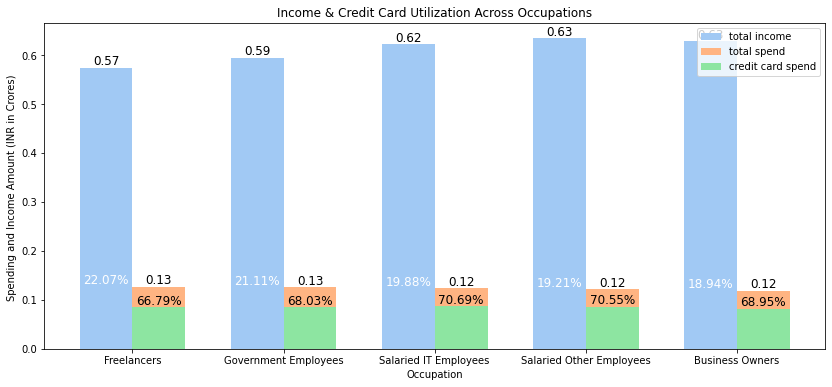

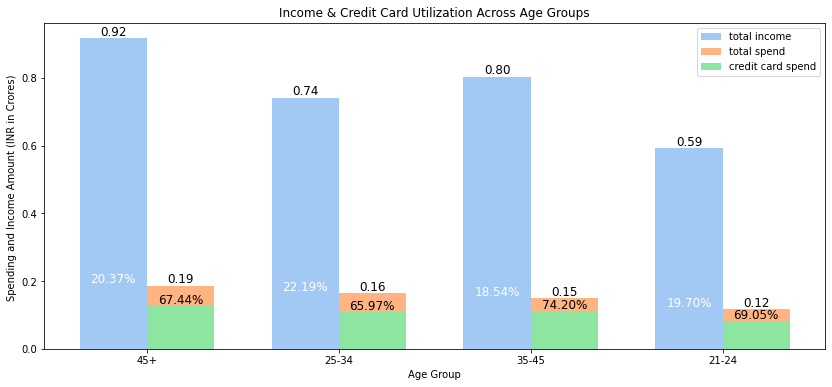

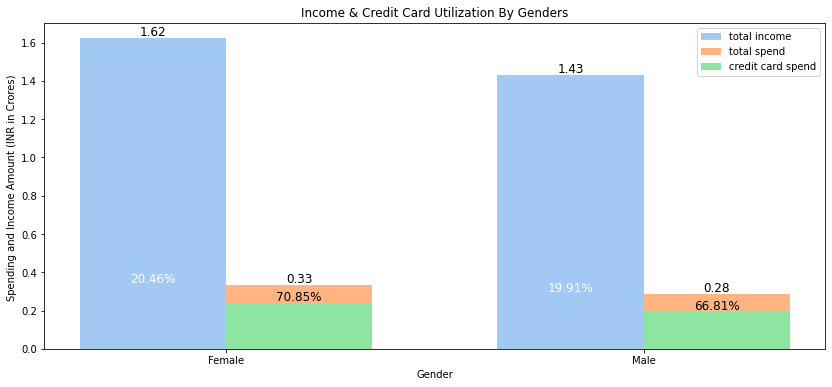

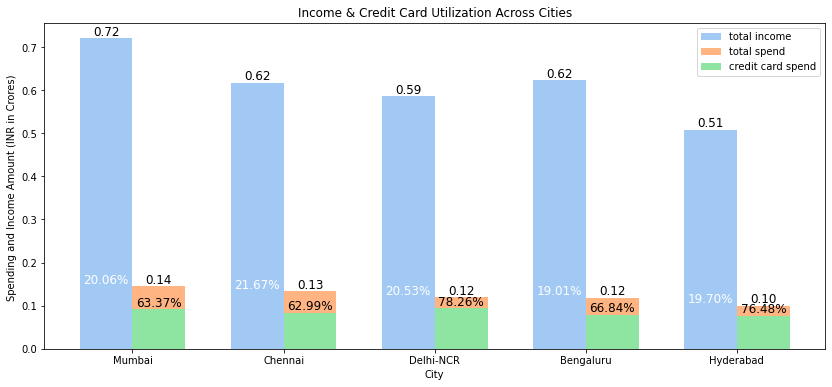

In [39]:
def plot_twin_categories(data, group_by_column, value_column,income_column, title, xlabel, ylabel):
    # Group by specified column and sum the values
    top_values = data.groupby(group_by_column)[[value_column, income_column, 'avg_credit_card_spend_per_month']].sum().sort_values(by = value_column, ascending=False)

    # Convert values to crocres
    values_in_crores = top_values[value_column] / 10000000 # 1,00,00,000 = 1 Crore
    income_values_in_crores = top_values[income_column] / 10000000 # 1,00,00,000 = 1 Crore
    cc_spends_values_in_crores = top_values['avg_credit_card_spend_per_month'] / 10000000 # 1,00,00,000 = 1 Crore

    # Plot the top values using Seaborn barplot
    plt.figure(figsize=(14, 6))
    bar_width = 0.35
    index = np.arange(len(values_in_crores.index))

    # Plotting
    bar_width = 0.35
    index = np.arange(len(values_in_crores.index))

    ax1 = plt.bar(index , income_values_in_crores, width=bar_width, label='total income')
    ax2 = plt.bar(index + bar_width, values_in_crores, width=bar_width, label='total spend')
    ax3 = plt.bar(index + bar_width, cc_spends_values_in_crores, width=bar_width, label='credit card spend')

    # Add text annotations at the top of each bar
    for i, value in enumerate(zip(income_values_in_crores, values_in_crores,cc_spends_values_in_crores)):
        plt.text(index[i], value[0], f'{value[0]:.2f}', ha='center', va='bottom', fontsize=12)
        plt.text(index[i] + bar_width, value[1], f'{value[1]:.2f}', ha='center', va='bottom', fontsize=12)
        plt.text(index[i] + bar_width, value[2], f'{(value[2]/value[1])*100:.2f}%', ha='center', va='bottom', fontsize=12)
        plt.text(index[i], value[1], f'{(value[1]/value[0])*100:.2f}%', ha='center', va='bottom', fontsize=12, color="white")


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(index + bar_width / 2,  values_in_crores.index)
    plt.legend()
    plt.show()

# Usage
plot_twin_categories(final_df, 'occupation', 'avg_spend_per_month', 'avg_income', 'Income & Credit Card Utilization Across Occupations', 'Occupation', 'Spending and Income Amount (INR in Crores) ')
plot_twin_categories(final_df, 'age_group', 'avg_spend_per_month', 'avg_income', 'Income & Credit Card Utilization Across Age Groups', 'Age Group', 'Spending and Income Amount (INR in Crores) ')
plot_twin_categories(final_df, 'gender', 'avg_spend_per_month', 'avg_income', 'Income & Credit Card Utilization By Genders', 'Gender', 'Spending and Income Amount (INR in Crores) ')
plot_twin_categories(final_df, 'city', 'avg_spend_per_month', 'avg_income', 'Income & Credit Card Utilization Across Cities', 'City', 'Spending and Income Amount (INR in Crores) ')



In [40]:
final_df.to_csv("final_df.csv")

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN,SpectralClustering, MiniBatchKMeans,Birch
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline, make_pipeline

# Tuning
from sklearn.model_selection import GridSearchCV


# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

# Saving Model
import joblib

In [45]:
final_df = pd.read_csv("final_df.csv")
final_df.drop(columns=['Unnamed: 0', 'customer_id'], inplace=True)
final_df

,age_group,city,occupation,gender,marital_status,avg_income,avg_spend_per_month,avg_credit_card_spend_per_month,income_utilization_perc,credit_card_spends_perc
0,25-34,Delhi-NCR,Business Owners,Female,married,39749,14634.0,2090.0,36.82,14.28
1,45+,Chennai,Salaried IT Employees,Female,single,118912,24398.0,8262.0,20.52,33.86
2,35-45,Hyderabad,Business Owners,Female,married,143413,17393.0,4649.0,12.13,26.73
3,45+,Hyderabad,Business Owners,Female,single,113072,15855.0,5267.0,14.02,33.22
4,45+,Chennai,Freelancers,Male,single,125954,25497.0,6107.0,20.24,23.95
...,...,...,...,...,...,...,...,...,...,...
355,45+,Delhi-NCR,Government Employees,Male,married,88611,7095.0,664.0,8.01,9.36
356,35-45,Mumbai,Government Employees,Male,married,58304,7348.0,7456.0,12.60,101.47
357,21-24,Chennai,Government Employees,Male,single,41289,10880.0,10120.0,26.35,93.01
358,25-34,Mumbai,Freelancers,Male,single,117315,8430.0,8430.0,7.19,100.00


In [46]:
categCols = final_df.nunique().sort_values()[final_df.nunique().sort_values() <= 8 ].index.values
categCols

array(['gender', 'marital_status', 'age_group', 'city', 'occupation'],
      dtype=object)

In [47]:
for i in categCols:
    print(i , final_df[i].unique())

gender ['Female' 'Male']
marital_status ['married' 'single']
age_group ['25-34' '45+' '35-45' '21-24']
city ['Delhi-NCR' 'Chennai' 'Hyderabad' 'Bengaluru' 'Mumbai']
occupation ['Business Owners' 'Salaried IT Employees' 'Freelancers'
 'Government Employees' 'Salaried Other Employees']


In [48]:
numeric_data = final_df.copy()
encoded_categories = ""
for i in categCols:
    le = LabelEncoder()
    print(i)
    numeric_data[i+'_new'] = le.fit_transform(numeric_data[i])
    print({l: i for i, l in enumerate(le.classes_)})
    encoded_categories = encoded_categories + i+"="+ str({l: i for i, l in enumerate(le.classes_)})

gender
{'Female': 0, 'Male': 1}
marital_status
{'married': 0, 'single': 1}
age_group
{'21-24': 0, '25-34': 1, '35-45': 2, '45+': 3}
city
{'Bengaluru': 0, 'Chennai': 1, 'Delhi-NCR': 2, 'Hyderabad': 3, 'Mumbai': 4}
occupation
{'Business Owners': 0, 'Freelancers': 1, 'Government Employees': 2, 'Salaried IT Employees': 3, 'Salaried Other Employees': 4}


In [49]:
## Dropping the old columns
numeric_data.drop(categCols ,axis=1, inplace=True)
numeric_data.columns = numeric_data.columns.str.replace('_new', '')
numeric_data.head()

,avg_income,avg_spend_per_month,avg_credit_card_spend_per_month,income_utilization_perc,credit_card_spends_perc,gender,marital_status,age_group,city,occupation
0,39749,14634.0,2090.0,36.82,14.28,0,0,1,2,0
1,118912,24398.0,8262.0,20.52,33.86,0,1,3,1,3
2,143413,17393.0,4649.0,12.13,26.73,0,0,2,3,0
3,113072,15855.0,5267.0,14.02,33.22,0,1,3,3,0
4,125954,25497.0,6107.0,20.24,23.95,1,1,3,1,1


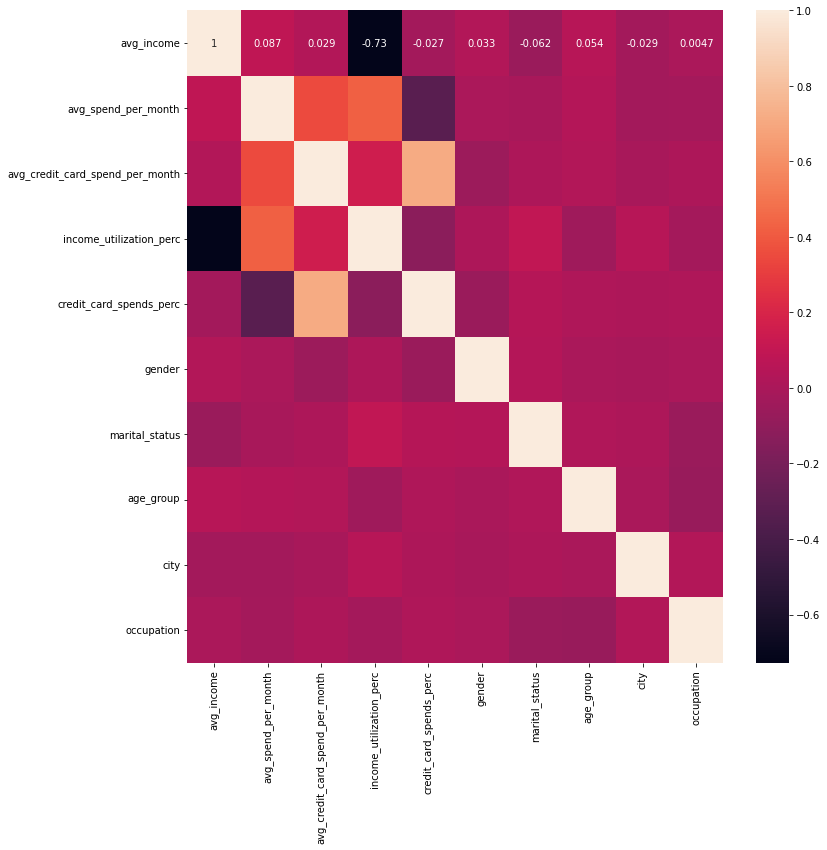

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [51]:
numeric_data.columns

Index(['avg_income', 'avg_spend_per_month', 'avg_credit_card_spend_per_month',
       'income_utilization_perc', 'credit_card_spends_perc', 'gender',
       'marital_status', 'age_group', 'city', 'occupation'],
      dtype='object')

In [52]:
std_scalar = StandardScaler()
scaled_df = std_scalar.fit_transform(numeric_data)

In [53]:
pca = PCA()
principalComponents = pca.fit(scaled_df)

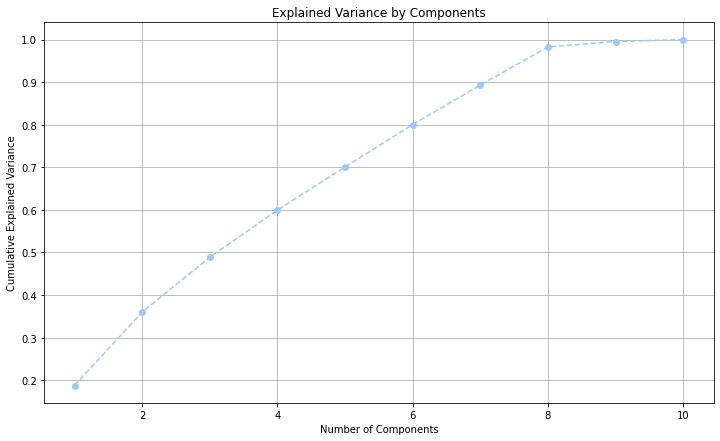

In [54]:
plt.figure(figsize = (12,7))
plt.plot(range(1,len(numeric_data.columns)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [55]:
pca = PCA(n_components = 6)
scores_pca = pca.fit_transform(scaled_df)

## K means clustering

In [73]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3, 4, 5, 6, 7, 8, 9,10]
sil_avgs = []
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n,random_state=9)
    cluster_labels = clusterer.fit_predict(scores_pca)

    silhouette_avg = silhouette_score(scores_pca, cluster_labels, sample_size=500)
    sil_avgs.append(silhouette_avg)
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.16064087848285882
For n_clusters = 3 The average silhouette_score is : 0.15795227798814038
For n_clusters = 4 The average silhouette_score is : 0.15416380522168868
For n_clusters = 5 The average silhouette_score is : 0.15351116555923636
For n_clusters = 6 The average silhouette_score is : 0.1504431066444222
For n_clusters = 7 The average silhouette_score is : 0.15842415494446066
For n_clusters = 8 The average silhouette_score is : 0.15869132232636982
For n_clusters = 9 The average silhouette_score is : 0.15615720527907911
For n_clusters = 10 The average silhouette_score is : 0.14590057060737283


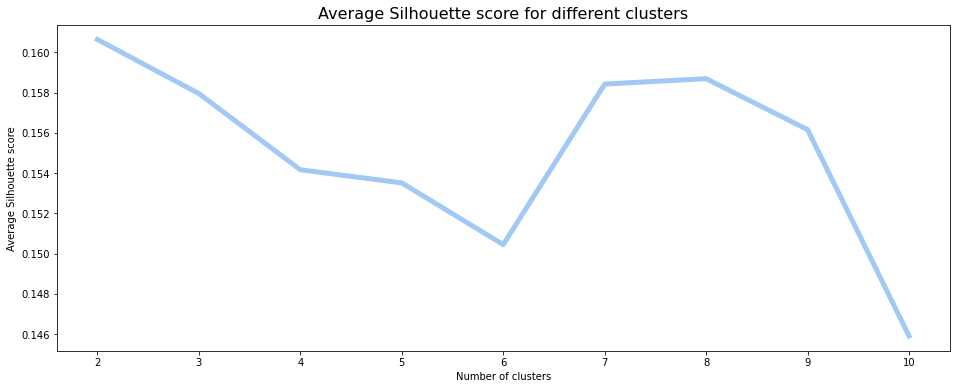

In [74]:
plt.figure(figsize = (16,6))
plt.plot(range_n_clusters,sil_avgs, linewidth=5)
plt.title('Average Silhouette score for different clusters', size=16)
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette score')
plt.show()

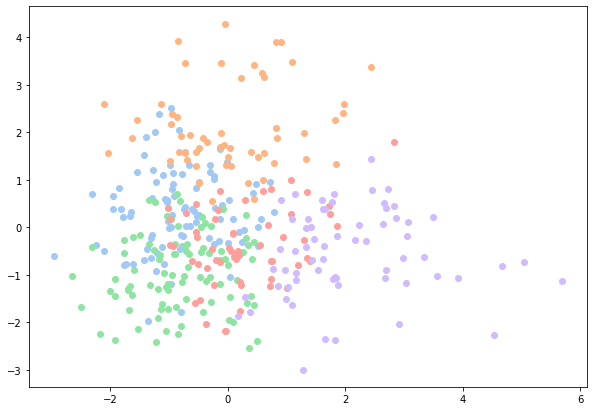

In [80]:
KM_model = KMeans(n_clusters = 5, random_state=0, init="k-means++")
yhat = KM_model.fit_predict(scores_pca)

# retrieve unique clusters
clusters = np.unique(yhat)

plt.figure(figsize = (10,7))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(scores_pca[row_ix, 0], scores_pca[row_ix, 1])

# show the plot
plt.show()

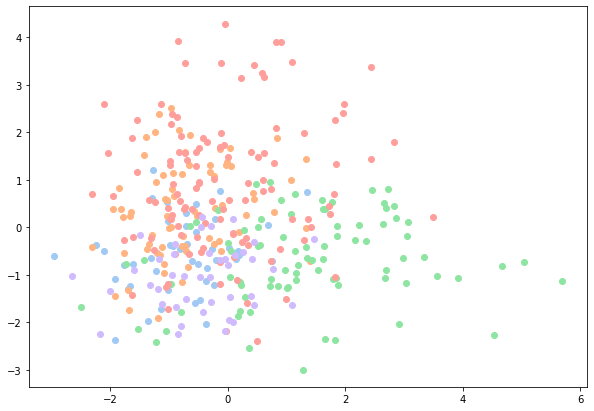

In [79]:
GM_model = GaussianMixture(n_components=5)
# model = SpectralClustering(n_clusters=4)
# model =  Birch(threshold=0.01, n_clusters=4)
yhat = GM_model.fit_predict(scores_pca)

# retrieve unique clusters
clusters = np.unique(yhat)

plt.figure(figsize = (10,7))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(scores_pca[row_ix, 0], scores_pca[row_ix, 1])

# show the plot
plt.show()

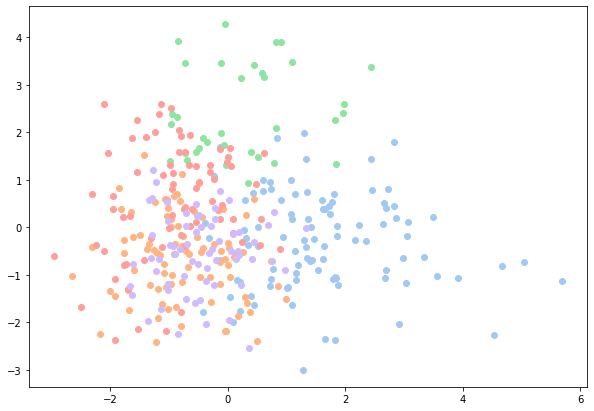

In [81]:
AC_model =  AgglomerativeClustering(n_clusters=5)
yhat = AC_model.fit_predict(scores_pca)

# retrieve unique clusters
clusters = np.unique(yhat)

plt.figure(figsize = (10,7))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(scores_pca[row_ix, 0], scores_pca[row_ix, 1])

# show the plot
plt.show()

In [82]:
clustered_numeric_data = numeric_data.copy()
clustered_final_data = final_df.copy()
clustered_numeric_data["cluster"] = yhat
clustered_final_data["cluster"] = yhat
clustered_final_data

,age_group,city,occupation,gender,marital_status,avg_income,avg_spend_per_month,avg_credit_card_spend_per_month,income_utilization_perc,credit_card_spends_perc,cluster
0,25-34,Delhi-NCR,Business Owners,Female,married,39749,14634.0,2090.0,36.82,14.28,1
1,45+,Chennai,Salaried IT Employees,Female,single,118912,24398.0,8262.0,20.52,33.86,4
2,35-45,Hyderabad,Business Owners,Female,married,143413,17393.0,4649.0,12.13,26.73,4
3,45+,Hyderabad,Business Owners,Female,single,113072,15855.0,5267.0,14.02,33.22,4
4,45+,Chennai,Freelancers,Male,single,125954,25497.0,6107.0,20.24,23.95,4
...,...,...,...,...,...,...,...,...,...,...,...
355,45+,Delhi-NCR,Government Employees,Male,married,88611,7095.0,664.0,8.01,9.36,3
356,35-45,Mumbai,Government Employees,Male,married,58304,7348.0,7456.0,12.60,101.47,3
357,21-24,Chennai,Government Employees,Male,single,41289,10880.0,10120.0,26.35,93.01,0
358,25-34,Mumbai,Freelancers,Male,single,117315,8430.0,8430.0,7.19,100.00,3


In [83]:
#Saving Scikitlearn models

joblib.dump(KM_model, "kmeans_model.pkl")
clustered_final_data.to_csv("clustered_final_data.csv", index=False)
clustered_numeric_data.to_csv("clustered_numeric_data.csv", index=False)

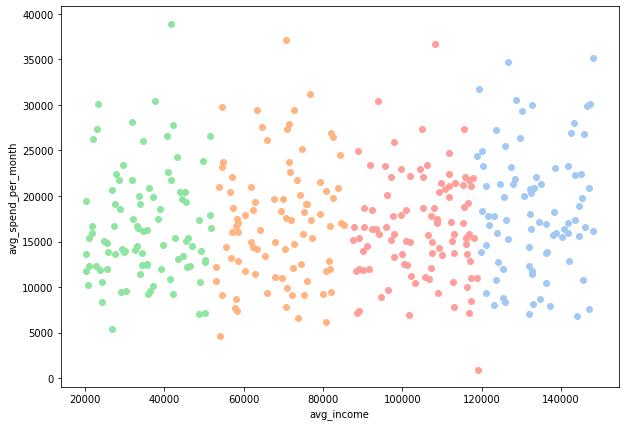

In [86]:
test_data = numeric_data[['avg_income', 'avg_spend_per_month']]
wcss = []
KM_model = KMeans(n_clusters =4, random_state=0, init="k-means++", n_init=10)
yhat = KM_model.fit_predict(test_data.values)

# retrieve unique clusters
clusters = np.unique(yhat)

plt.figure(figsize = (10,7))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(test_data.values[row_ix, 0], test_data.values[row_ix, 1])

plt.xlabel("avg_income")
plt.ylabel("avg_spend_per_month")

# show the plot
plt.show()

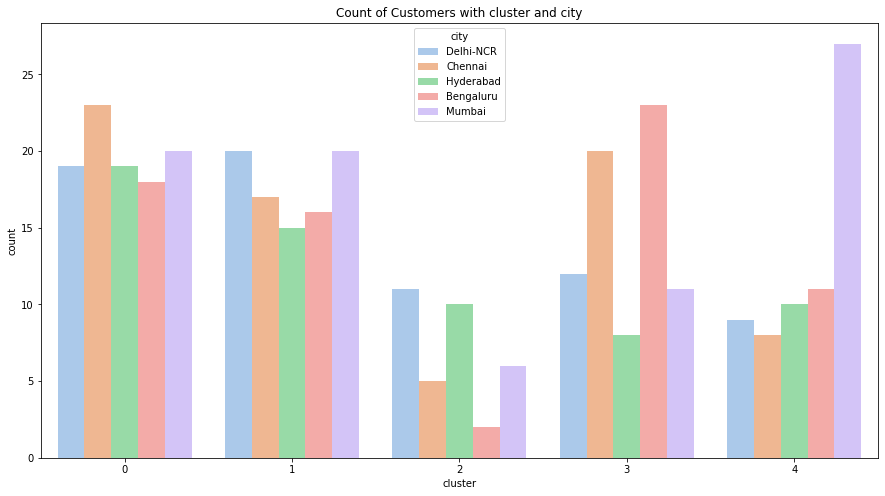

In [87]:
plt.figure(figsize=((15,8)))
ax = sns.countplot( x = 'cluster', hue = 'city' , data = clustered_final_data)
plt.title(f"Count of Customers with cluster and city")
plt.show()

In [90]:
clustered_numeric_data = final_df = pd.read_csv('CLUSTERED_NUMERIC_DATA.csv')
clustered_numeric_data

,avg_income,avg_spend_per_month,avg_credit_card_spend_per_month,income_utilization_perc,credit_card_spends_perc,gender,marital_status,age_group,city,occupation,cluster
0,39749,14634.0,2090.0,36.82,14.28,0,0,1,2,0,1
1,118912,24398.0,8262.0,20.52,33.86,0,1,3,1,3,4
2,143413,17393.0,4649.0,12.13,26.73,0,0,2,3,0,4
3,113072,15855.0,5267.0,14.02,33.22,0,1,3,3,0,4
4,125954,25497.0,6107.0,20.24,23.95,1,1,3,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
355,88611,7095.0,664.0,8.01,9.36,1,0,3,2,2,3
356,58304,7348.0,7456.0,12.60,101.47,1,0,2,4,2,3
357,41289,10880.0,10120.0,26.35,93.01,1,1,0,1,2,0
358,117315,8430.0,8430.0,7.19,100.00,1,1,1,4,1,3


In [91]:
X = clustered_numeric_data.drop(columns = ['cluster']).copy() # Cluster is our target variable
y = clustered_numeric_data["cluster"].copy()

In [92]:
class_weight = {0:1 ,3:1,2:1.3, 1:1.5, 4: 1.5}

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True , stratify=y)

print("The Shape of X_train:", X_train.shape)
print("The Shape of X_test:", X_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)
print("\n\n---------------------------------------------------------------------------------\n\n")

models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0 , class_weight=class_weight)))
models.append(('GaussianNB'   , GaussianNB()))
models.append(('SVM'  , SVC(random_state=0 ,probability=True , class_weight=class_weight)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0 , class_weight=class_weight)))
models.append(('XGBClassifier', XGBClassifier(random_state=0)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0 )))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0 , class_weight=class_weight)))


model_name = []
train_accuracy = []
test_accuracy = []

for name, model in models:

    model.fit(X_train,y_train)
    model_name.append(name)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    print("Done" + name)
Accuracy_df = pd.DataFrame({"Model" : model_name , "train_accuracy" : train_accuracy, "test_accuracy" : test_accuracy})
Accuracy_df

The Shape of X_train: (252, 10)
The Shape of X_test: (108, 10)
The Shape of y_train: (252,)
The Shape of y_test: (108,)


---------------------------------------------------------------------------------


DoneLogisticRegression
DoneGaussianNB
DoneSVM
DoneDecisionTreeClassifier


C:\Users\Sree Vidya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DoneXGBClassifier
DoneGradientBoostingClassifier
DoneKNeighborsClassifier
DoneRandomForestClassifier


,Model,train_accuracy,test_accuracy
0,LogisticRegression,0.611111,0.555556
1,GaussianNB,0.773810,0.611111
2,SVM,0.527778,0.435185
3,DecisionTreeClassifier,1.000000,0.583333
4,XGBClassifier,1.000000,0.750000
5,GradientBoostingClassifier,1.000000,0.703704
6,KNeighborsClassifier,0.746032,0.546296
7,RandomForestClassifier,1.000000,0.685185


                        Model  train_accuracy  test_accuracy
2                         SVM        0.527778       0.435185
6        KNeighborsClassifier        0.746032       0.546296
0          LogisticRegression        0.611111       0.555556
3      DecisionTreeClassifier        1.000000       0.583333
1                  GaussianNB        0.773810       0.611111
7      RandomForestClassifier        1.000000       0.685185
5  GradientBoostingClassifier        1.000000       0.703704
4               XGBClassifier        1.000000       0.750000


<BarContainer object of 8 artists>

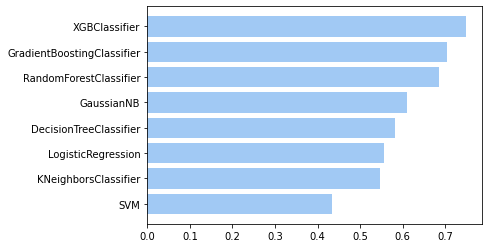

In [94]:
Temp = Accuracy_df.sort_values("test_accuracy")
print(Temp)
plt.barh( Temp["Model"],Temp["test_accuracy"] )

In [95]:
def NormalizedModel(nameOfScaler):

    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler == 'normalizer':
        scaler = Normalizer()
    elif nameOfScaler == 'binarizer':
        scaler = Binarizer()

    pipelines = []
    pipelines.append((nameOfScaler+'_LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression(class_weight=class_weight))])))
    pipelines.append((nameOfScaler+'_KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'_DT'  , Pipeline([('Scaler', scaler),('DT'  , DecisionTreeClassifier(class_weight=class_weight))])))
    pipelines.append((nameOfScaler+'_NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'_SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'_XGB' , Pipeline([('Scaler', scaler),('XGB' , XGBClassifier())])  ))
    pipelines.append((nameOfScaler+'_GBM' , Pipeline([('Scaler', scaler),('GBM' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'_RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier(class_weight=class_weight))])  ))

    return pipelines

# Train model
def fit_model(X_train, y_train, X_test , y_test ,models):

    num_folds = 10
    scoring = 'accuracy'

    model_name = []
    train_accuracy = []
    test_accuracy = []

    for name, model in models:

        model.fit(X_train,y_train)
        model_name.append(name)
        train_accuracy.append(model.score(X_train, y_train))
        test_accuracy.append(model.score(X_test, y_test))
        print("Done" + name)
        Accuracy_df = pd.DataFrame({"Model" : model_name , "train_accuracy" : train_accuracy, "test_accuracy" : test_accuracy})
    print(Accuracy_df)
    return Accuracy_df

In [96]:
ScaledModel = NormalizedModel('standard')
df = fit_model(X_train, y_train, X_test , y_test, ScaledModel)

Donestandard_LR
Donestandard_KNN
Donestandard_DT
Donestandard_NB
Donestandard_SVM
Donestandard_XGB
Donestandard_GBM
Donestandard_RF
          Model  train_accuracy  test_accuracy
0   standard_LR        0.857143       0.731481
1  standard_KNN        0.916667       0.796296
2   standard_DT        1.000000       0.592593
3   standard_NB        0.821429       0.703704
4  standard_SVM        0.980159       0.842593
5  standard_XGB        1.000000       0.750000
6  standard_GBM        1.000000       0.712963
7   standard_RF        1.000000       0.685185


          Model  train_accuracy  test_accuracy
2   standard_DT        1.000000       0.592593
7   standard_RF        1.000000       0.685185
3   standard_NB        0.821429       0.703704
6  standard_GBM        1.000000       0.712963
0   standard_LR        0.857143       0.731481
5  standard_XGB        1.000000       0.750000
1  standard_KNN        0.916667       0.796296
4  standard_SVM        0.980159       0.842593


<BarContainer object of 8 artists>

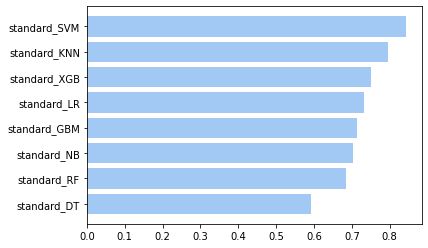

In [97]:
Temp = df.sort_values("test_accuracy")
print(Temp)
plt.barh( Temp["Model"],Temp["test_accuracy"] )

In [98]:
finalmodels = []

finalmodels.append(('RF' , Pipeline([('RF', RandomForestClassifier(class_weight=class_weight))])))
finalmodels.append(('XGB' , Pipeline([('XGB', XGBClassifier())])))

finalmodels.append(('std_RF' , Pipeline([('Scaler' ,StandardScaler()), ('RF', RandomForestClassifier(class_weight=class_weight))])))
finalmodels.append(('std_XGB' , Pipeline([('Scaler' ,StandardScaler()), ('XGB' , XGBClassifier())])))
finalmodels.append(('std_LR' , Pipeline([('Scaler' ,StandardScaler()), ('LR' , LogisticRegression(class_weight=class_weight))])))

In [99]:
# Metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# pipeline = make_pipeline(MinMaxScaler(),  LogisticRegression())
for name, model in finalmodels:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n*****************************************************************************")
    print(name)
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score :{accuracy_score(y_test, y_pred) * 100:.1f}%")

    print(classification_report(y_test, y_pred))


*****************************************************************************
RF
Training Accuracy Score: 100.0%
Validation Accuracy Score :69.4%
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.52      0.62      0.56        26
           2       0.83      1.00      0.91        10
           3       0.75      0.55      0.63        22
           4       0.74      0.70      0.72        20

    accuracy                           0.69       108
   macro avg       0.72      0.73      0.72       108
weighted avg       0.70      0.69      0.69       108


*****************************************************************************
XGB
Training Accuracy Score: 100.0%
Validation Accuracy Score :75.0%
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.64      0.69      0.67        26
           2       0.83      1.00      0.91        10

### Retraining Model with 100% data & Saving Model File

In [100]:
import pickle
import os

pipeline = make_pipeline(StandardScaler(),  LogisticRegression(class_weight=class_weight))
model = pipeline.fit(X, y)
joblib.dump(model, "STD_LR_model.joblib")
with open('STD_LR_model.pkl', 'wb') as fileWriteStream:
    pickle.dump(model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

In [101]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [102]:
customer_no = 100
X.iloc[customer_no] , y.iloc[customer_no]

(avg_income                         74602.00
 avg_spend_per_month                25163.00
 avg_credit_card_spend_per_month    21456.00
 income_utilization_perc               33.73
 credit_card_spends_perc               85.27
 gender                                 1.00
 marital_status                         0.00
 age_group                              0.00
 city                                   0.00
 occupation                             4.00
 Name: 100, dtype: float64,
 0)

In [103]:
X.iloc[customer_no].index

Index(['avg_income', 'avg_spend_per_month', 'avg_credit_card_spend_per_month',
       'income_utilization_perc', 'credit_card_spends_perc', 'gender',
       'marital_status', 'age_group', 'city', 'occupation'],
      dtype='object')

In [104]:
sample = X.iloc[customer_no]
single_sample = np.array(sample).reshape(1,-1)
pred = model.predict(single_sample)
print(pred.item())
print(max(model.predict_proba(single_sample)[0]))
print((model.predict_proba(single_sample)[0]))

0
0.7680564230133747
[7.68056423e-01 2.22157175e-01 8.44313207e-03 7.83605671e-04
 5.59664356e-04]


this customer belong to Cluster 4
If we look at the probabilities it is clear that 76% , model is sure that this customer belong to cluster 4.

In [105]:
loaded_model = joblib.load("STD_LR_model.joblib")

data = [69308,29267,13698,42.23, 46.80, 1,0,1,4,0]
data = np.array(data).reshape(1, -1)
pred = loaded_model.predict(data)
print(pred.item())
print(max(loaded_model.predict_proba(data)[0]))
print((loaded_model.predict_proba(data)[0]))

0
0.7268108304330273
[7.26810830e-01 4.05261252e-03 1.09013802e-04 3.66671547e-05
 2.68990876e-01]
